In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Churn /Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [6]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [7]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [8]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [9]:
df.shape

(10000, 11)

In [10]:
df[df.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [11]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


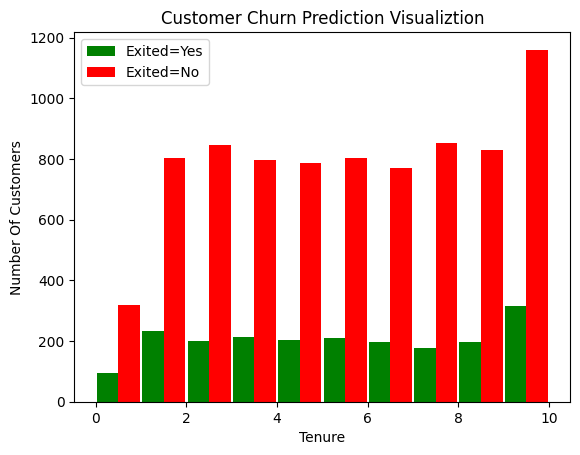

In [12]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend();

The chart shows that churn (Exited=Yes) is higher in customers with shorter tenures (0-2 years) but decreases with longer tenure (3-10 years). However, a sharp rise in churn occurs at the 10-year mark. Most customers stay, especially those with mid-to-long tenures, indicating retention strategies should target early and long-term customers.

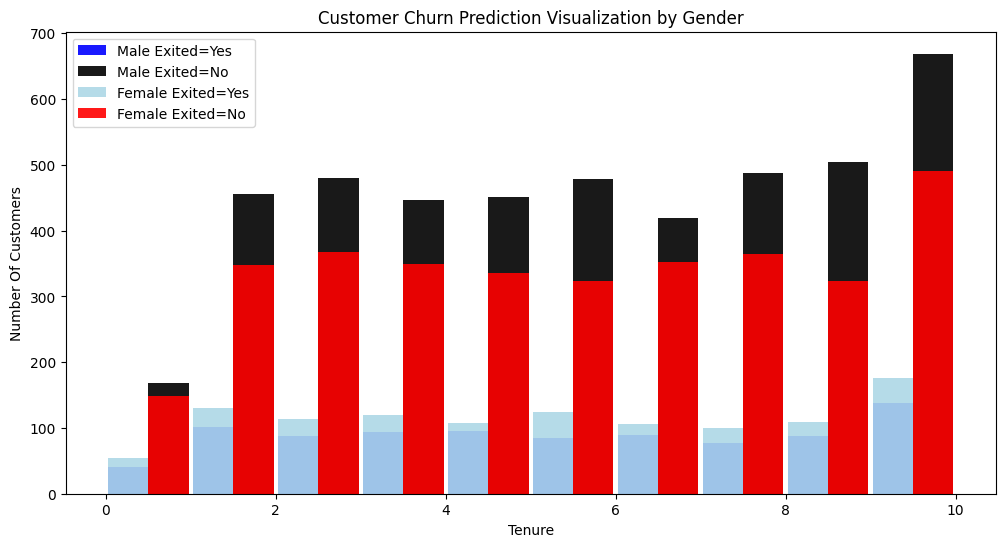

In [13]:
tenure_male_churn_no = df[(df.Exited == 0) & (df.Gender == 'Male')].Tenure
tenure_male_churn_yes = df[(df.Exited == 1) & (df.Gender == 'Male')].Tenure

tenure_female_churn_no = df[(df.Exited == 0) & (df.Gender == 'Female')].Tenure
tenure_female_churn_yes = df[(df.Exited == 1) & (df.Gender == 'Female')].Tenure

plt.figure(figsize=(12, 6))
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization by Gender")

plt.hist([tenure_male_churn_yes, tenure_male_churn_no],
         rwidth=0.95, color=['blue', 'black'], label=['Male Exited=Yes', 'Male Exited=No'], alpha=0.9)
plt.hist([tenure_female_churn_yes, tenure_female_churn_no],
         rwidth=0.95, color=['lightblue', 'red'], label=['Female Exited=Yes', 'Female Exited=No'], alpha=0.9)

plt.legend()
plt.show()


Male Customers:

The blue bars represent males who churned (Exited=Yes), and the black bars represent males who stayed (Exited=No).
Male churn rates seem lower compared to females across most tenure ranges.

Female Customers:

The light blue bars represent females who churned, while the red bars represent females who stayed.
Females show a higher churn rate, especially in the higher tenure ranges (e.g., 8–10 years).

Impact of Tenure:

Short Tenure (0–2 years):
Customers with shorter tenures are more likely to churn, with females dominating the churn rates.

Medium Tenure (3–6 years):
Churn rates are more balanced, but females still have a slightly higher churn rate.

Long Tenure (7–10 years):
Even at higher tenures, churn rates remain relatively high for females, indicating that tenure does not significantly reduce female churn rates.

General Trends:

Female customers, irrespective of tenure, tend to churn more frequently than males.
For both genders, customers with longer tenures (8–10 years) tend to have lower churn rates compared to those with shorter tenures.

In [14]:
df.Age.value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
88,1
82,1


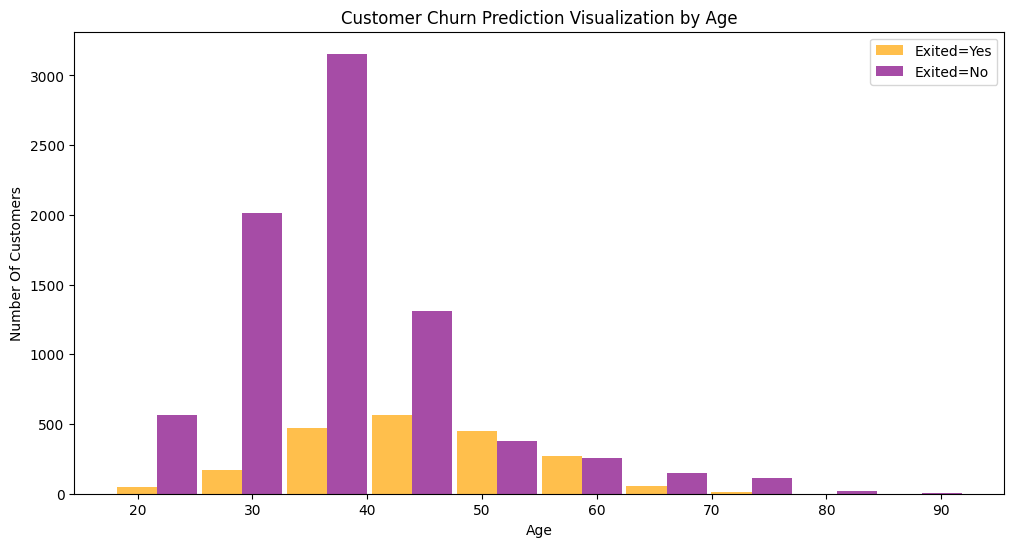

In [15]:
age_churn_no = df[df.Exited == 0].Age
age_churn_yes = df[df.Exited == 1].Age

plt.figure(figsize=(12, 6))
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization by Age")

plt.hist([age_churn_yes, age_churn_no], rwidth=0.95, color=['orange', 'purple'], label=['Exited=Yes', 'Exited=No'], alpha=0.7)

plt.legend()
plt.show()


Churn is highest among customers aged 30-40, with a sharp peak around 40 years. Most retained customers are also in this age range. Churn decreases for older and younger customers, suggesting that targeted retention strategies should focus on the 30-40 age group.

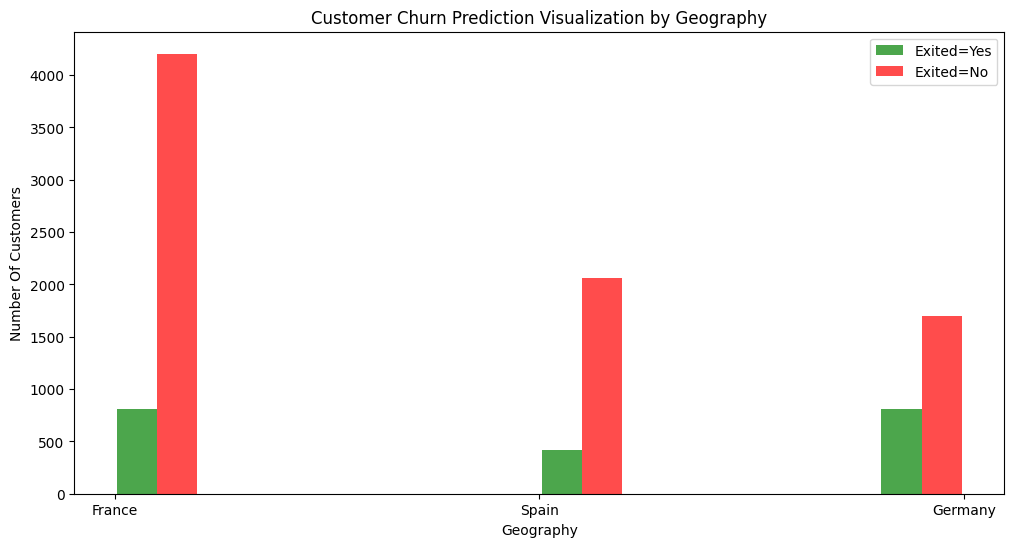

In [16]:
geo_location_no = df[df.Exited == 0].Geography
geo_location_yes = df[df.Exited == 1].Geography
plt.figure(figsize=(12, 6))
plt.xlabel("Geography")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization by Geography")

plt.hist([geo_location_yes, geo_location_no], rwidth=0.95, color=['green', 'red'],
         label=['Exited=Yes', 'Exited=No'],
         alpha=0.7)

plt.legend()
plt.show()


France has the highest number of non-exited customers but relatively low churn.

Spain has fewer customers overall, with lower churn rates.

Germany shows a higher proportion of churn compared to non-churned customers, indicating a potential issue in customer retention.

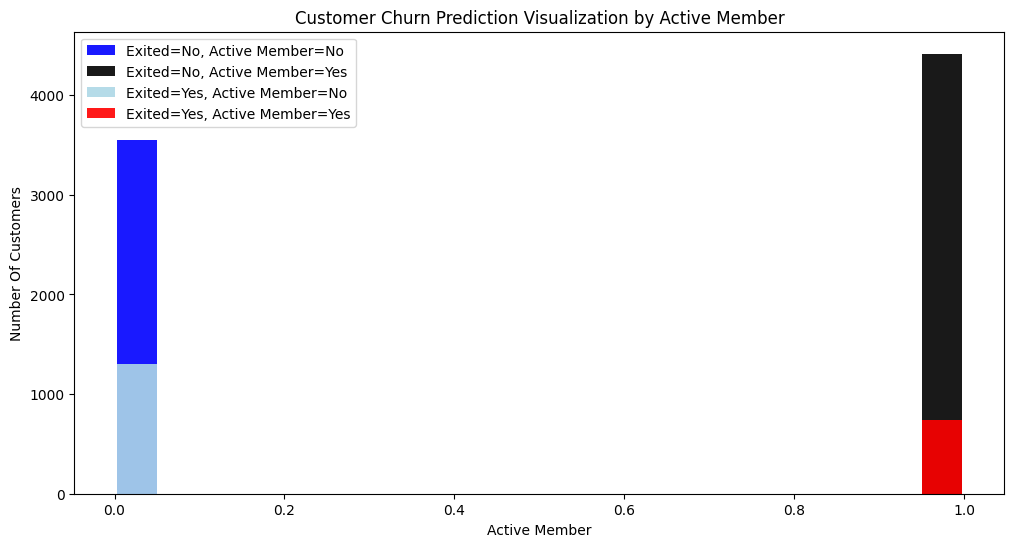

In [17]:
active_member_no_churn_no = df[(df.Exited == 0)& (df.IsActiveMember == 0)]
active_member_yes_churn_no = df[(df.Exited == 0)& (df.IsActiveMember == 1)]
active_member_no_churn_yes = df[(df.Exited == 1) & (df.IsActiveMember == 0)]
active_member_yes_churn_yes = df[(df.Exited == 1)& (df.IsActiveMember == 1)]

plt.figure(figsize=(12, 6))
plt.xlabel("Active Member")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization by Active Member")

# Histogram for Exited=No
plt.hist([active_member_no_churn_no['IsActiveMember'], active_member_yes_churn_no['IsActiveMember']],
         rwidth=0.95, color=['blue', 'black'], label=['Exited=No, Active Member=No',
                                         'Exited=No, Active Member=Yes'], alpha=0.9)

# Histogram for Exited=Yes
plt.hist([active_member_no_churn_yes['IsActiveMember'], active_member_yes_churn_yes['IsActiveMember']],
         rwidth=0.95, color=['lightblue', 'red'], label=['Exited=Yes, Active Member=No',
                                            'Exited=Yes, Active Member=Yes'], alpha=0.9)


plt.legend()
plt.show()





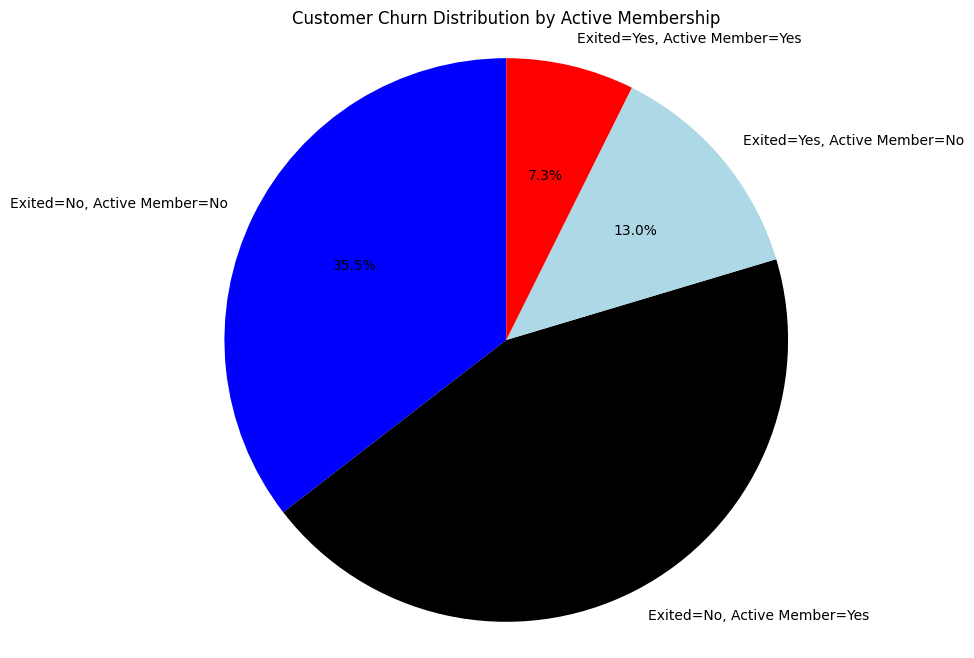

In [18]:
active_member_no_churn_no = df[(df.Exited == 0) & (df.IsActiveMember == 0)].shape[0]
active_member_yes_churn_no = df[(df.Exited == 0) & (df.IsActiveMember == 1)].shape[0]
active_member_no_churn_yes = df[(df.Exited == 1) & (df.IsActiveMember == 0)].shape[0]
active_member_yes_churn_yes = df[(df.Exited == 1) & (df.IsActiveMember == 1)].shape[0]

df1 = [
    active_member_no_churn_no,
    active_member_yes_churn_no,
    active_member_no_churn_yes,
    active_member_yes_churn_yes
]
labels = [
    'Exited=No, Active Member=No',
    'Exited=No, Active Member=Yes',
    'Exited=Yes, Active Member=No',
    'Exited=Yes, Active Member=Yes'
]
colors = ['blue', 'black', 'lightblue', 'red']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df1, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Customer Churn Distribution by Active Membership')
plt.axis('equal')


plt.show()

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [20]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [21]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-21-e608bb382eef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-21-e608bb382eef>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [22]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df['Geography'] = df['Geography'].astype(str)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [24]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1 = df1.astype(int)
print(df1)

      CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0             619       1   42       2        0              1          1   
1             608       1   41       1    83807              1          0   
2             502       1   42       8   159660              3          1   
3             699       1   39       1        0              2          0   
4             850       1   43       2   125510              1          1   
...           ...     ...  ...     ...      ...            ...        ...   
9995          771       0   39       5        0              2          1   
9996          516       0   35      10    57369              1          1   
9997          709       1   36       7        0              1          0   
9998          772       0   42       3    75075              2          1   
9999          792       1   28       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0       

In [25]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [27]:
df1.shape

(10000, 13)

In [28]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228655,0.000000,1,1,0.508488,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299225,0.333333,1,0,0.464429,1,0,1,0


In [29]:
df1.dtypes

,0
CreditScore,float64
Gender,int64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,float64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [30]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228655,0.000000,1,1,0.508488,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299225,0.333333,1,0,0.464429,1,0,1,0


# Train Test Split

In [31]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [32]:
X_train.shape

(8000, 12)

In [33]:
X_test.shape

(2000, 12)

In [34]:
y_train.shape

(8000,)

In [35]:
y_test.shape

(2000,)

In [36]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096274,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948550,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646866,1,0,0
5210,0.402,0,0.229730,0.7,0.517011,0.333333,0,0,0.434671,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421900,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303414,0,0,1
7524,0.620,1,0.297297,0.8,0.666331,0.000000,1,1,0.925813,1,0,0
9412,0.750,0,0.108108,0.6,0.393323,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567524,1,0,0


In [37]:
len(X_train.columns)

12

# Build an ANN Model in Tensorflow or Keras

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.7955
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7974
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8071
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8140
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8148
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8160
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8207
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8229
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3975 - accura

## Model Architecture

keras.Sequential: Creates a linear stack of layers.
keras.layers.Dense(12, input_shape=(12,),

activation='relu'): The first layer with 12 units and ReLU (Rectified Linear Unit) activation function.

 The input_shape=(12,) specifies that each input sample has 12 features.

keras.layers.Dense(6, activation='relu'): The second hidden layer with 6 units and ReLU activation. This layer helps the model learn complex patterns by introducing non-linearity.

keras.layers.Dense(1, activation='sigmoid'): The output layer with 1 unit and a sigmoid activation function. This ensures that the model's output is a probability (ranging from 0 to 1) suitable for binary classification.


## Model Compilation


optimizer='adam': The Adam optimizer is used, which combines the benefits of both Adagrad and RMSProp. It's efficient and often works well in practice.

loss='binary_crossentropy': The binary cross-entropy loss function is used for binary classification tasks. It measures the difference between the predicted probability and the actual label (0 or 1).

metrics=['accuracy']: The accuracy metric tracks the proportion of correctly predicted instances.

## Model Training

model.fit(X_train, y_train, epochs=100): This trains the model using the training data X_train (features) and y_train (labels). The training runs for 100 epochs, meaning the model will iterate over the entire dataset 100 times.


## Interpretation:
Training Process: The model will learn to adjust its weights based on the input data and the labels, using the backpropagation algorithm and the Adam optimizer to minimize the binary cross-entropy loss.

Epochs: 100 epochs means the training process will be repeated 100 times for the entire training dataset. More epochs can lead to better learning, but it could also result in overfitting if the model starts to memorize the training data rather than generalizing to unseen data.

Evaluation: After training, you can evaluate the model's performance on the test set and use metrics such as accuracy, precision, recall, and F1-score for a comprehensive assessment.


In [39]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8550


[0.35013559460639954, 0.8550000190734863]

In [40]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.02399983],
       [0.04899977],
       [0.05753274],
       [0.07472449],
       [0.050384  ]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [43]:
y_test[:10]

,Exited
7054,0
442,0
3954,0
2288,0
3196,0
6178,0
8351,0
5658,1
2065,0
413,1


Text(95.72222222222221, 0.5, 'Truth')

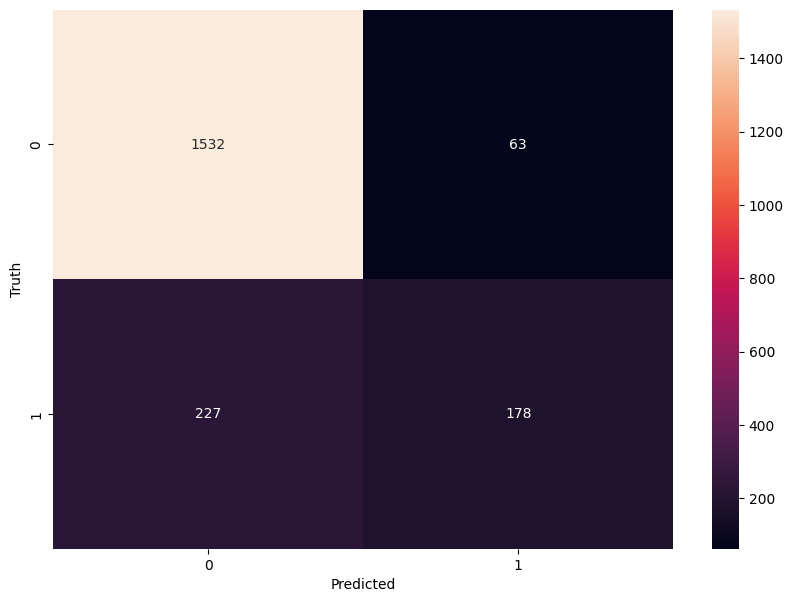

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The model has a decent overall accuracy of 85%.

The precision of 71% for predicting churning customers indicates that when the model predicts a customer will churn, it is correct 71% of the time.

The recall of 48% for Class 1 shows the model struggles to identify churners effectively, missing more than half of them.

The F1-score of 0.57 indicates a need for improvement, especially in handling Class 1 (churn predictions).

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions


print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print overall accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

63/63 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy: 0.85
Precision: 0.74
Recall: 0.44
F1 Score: 0.55


The model performs well in identifying Class 0 with high precision, recall, and F1-score.

The performance for Class 1 is weaker, especially in recall (48%), which indicates that the model misses a significant number of positive samples (false negatives).

The overall accuracy (85%) is decent, but this is somewhat misleading if the dataset is imbalanced (e.g., if Class 0 is much more frequent than Class 1).

Consider using strategies to improve recall for Class 1, such as adjusting class weights during training, using oversampling techniques, or optimizing the model architecture and hyperparameters.

In summary, the model is good at identifying Class 0 but needs improvement in detecting Class 1, where recall is notably low.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.69      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000

Accuracy: 0.81
Precision: 0.57
Recall: 0.18
F1 Score: 0.27


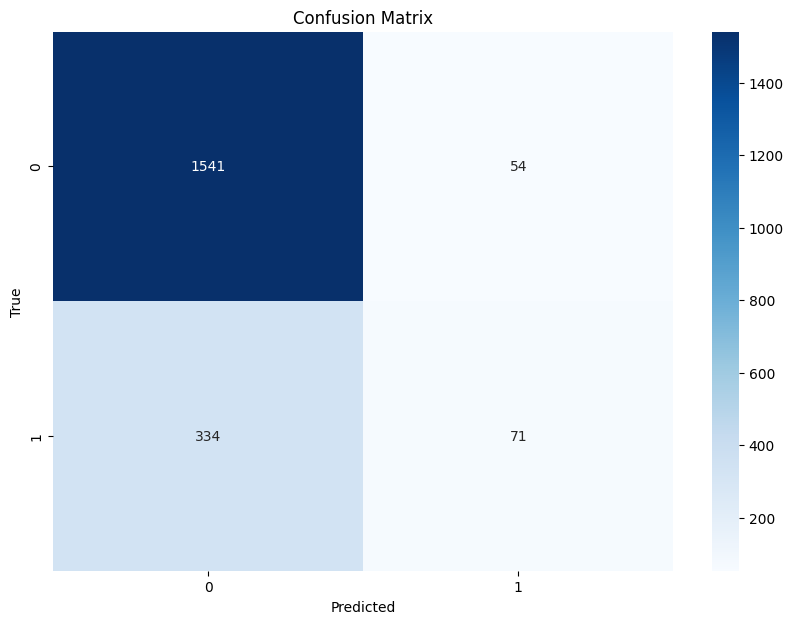

In [48]:
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()